In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import csv
import math
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

# ****Run this smaller version of the dataset to test our project****
# df = pd.read_csv('SteamEnglishReviewsSample.csv')

# Run this original version of the dataset to test our project
df = pd.read_csv('SteamEnglishReviews.csv')

print(df.head())

   Unnamed: 0                  app_name language  \
0           3  The Witcher 3: Wild Hunt  english   
1           5  The Witcher 3: Wild Hunt  english   
2           6  The Witcher 3: Wild Hunt  english   
3          18  The Witcher 3: Wild Hunt  english   
4          20  The Witcher 3: Wild Hunt  english   

                                              review  timestamp_created  \
0  One of the best RPG's of all time, worthy of a...         1611379970   
1             good story, good graphics. lots to do.         1611379264   
2                                           dis gud,         1611379091   
3  favorite game of all time cant wait for the Ne...         1611373086   
4                          Why wouldn't you get this         1611371978   

   timestamp_updated  recommended  votes_helpful  votes_funny  comment_count  \
0         1611379970         True              0            0              0   
1         1611379264         True              0            0              0

In [3]:
print (df.columns)

Index(['Unnamed: 0', 'app_name', 'language', 'review', 'timestamp_created',
       'timestamp_updated', 'recommended', 'votes_helpful', 'votes_funny',
       'comment_count', 'steam_purchase', 'received_for_free',
       'written_during_early_access', 'author.num_games_owned',
       'author.num_reviews', 'author.playtime_forever',
       'author.playtime_last_two_weeks', 'author.playtime_at_review',
       'author.last_played'],
      dtype='object')


In [4]:
df

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,3,The Witcher 3: Wild Hunt,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,0,0,True,False,False,5,3,5587.0,3200.0,5524.0,1.611384e+09
1,5,The Witcher 3: Wild Hunt,english,"good story, good graphics. lots to do.",1611379264,1611379264,True,0,0,0,True,False,False,11,1,823.0,823.0,823.0,1.611379e+09
2,6,The Witcher 3: Wild Hunt,english,"dis gud,",1611379091,1611379091,True,0,0,0,True,False,False,27,2,4192.0,3398.0,4192.0,1.611352e+09
3,18,The Witcher 3: Wild Hunt,english,favorite game of all time cant wait for the Ne...,1611373086,1611373086,True,0,0,0,True,False,False,33,1,23329.0,177.0,23329.0,1.611219e+09
4,20,The Witcher 3: Wild Hunt,english,Why wouldn't you get this,1611371978,1611371978,True,0,0,0,True,False,False,131,2,8557.0,2004.0,8557.0,1.611371e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780435,19999987,The Elder Scrolls V: Skyrim Special Edition,english,I WANT A REFUND\n,1588779455,1588779455,False,0,1,0,True,False,False,15,2,1653.0,0.0,217.0,1.593258e+09
8780436,19999989,The Elder Scrolls V: Skyrim Special Edition,english,You know you want it.,1588778760,1588778760,True,1,1,0,False,False,False,64,1,2969.0,0.0,1163.0,1.589317e+09
8780437,19999990,The Elder Scrolls V: Skyrim Special Edition,english,Very cool dragon and theft,1588777285,1588777285,True,0,0,0,True,False,False,32,6,1165.0,0.0,1063.0,1.598537e+09
8780438,19999994,The Elder Scrolls V: Skyrim Special Edition,english,The game is great,1588776021,1588776021,True,0,0,0,True,False,False,25,7,1861.0,0.0,768.0,1.603818e+09


In [5]:
df.describe()

,Unnamed: 0,timestamp_created,timestamp_updated,votes_helpful,votes_funny,comment_count,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780440e+06,8.780438e+06,8.780438e+06,8.769680e+06,8.780438e+06
mean,9.857102e+06,1.539505e+09,1.543040e+09,5.008932e+05,1.291368e+05,1.293550e-01,1.502837e+06,5.009029e+05,1.636568e+04,1.651123e+02,9.160439e+03,1.577832e+09
std,5.773377e+06,6.434651e+07,6.293887e+07,1.484232e+09,2.355034e+07,2.036609e+00,2.570764e+09,1.484232e+09,3.996454e+04,7.713387e+02,2.592765e+04,5.366909e+07
min,3.000000e+00,1.290198e+09,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.153034e+06,1.498343e+09,1.504905e+09,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.000000e+00,1.299000e+03,0.000000e+00,5.980000e+02,1.569880e+09
50%,9.572375e+06,1.562131e+09,1.568998e+09,0.000000e+00,0.000000e+00,0.000000e+00,8.100000e+01,4.000000e+00,4.431000e+03,0.000000e+00,1.972000e+03,1.599436e+09
75%,1.529647e+07,1.591020e+09,1.592911e+09,1.000000e+00,0.000000e+00,0.000000e+00,1.870000e+02,1.100000e+01,1.496100e+04,0.000000e+00,7.126000e+03,1.609085e+09
max,2.000000e+07,1.611425e+09,2.117308e+09,4.398047e+12,4.294967e+09,1.432000e+03,4.398047e+12,4.398047e+12,3.744943e+06,2.375400e+04,3.228103e+06,1.611430e+09


## Removing Outliers

In [6]:
#30000
recs = df["votes_helpful"]
unique, counts = np.unique(recs, return_counts=True)
print(unique)

[            0             1             2 ...         28211         29608
 4398046511106]


In [7]:
#16000
recs = df["votes_funny"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[1650:])

[     13635      13795      13806      14376      15417      15707
 4294967288 4294967289 4294967290 4294967291 4294967292 4294967293
 4294967294 4294967295]


In [8]:
#6000
recs = df["author.num_reviews"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[720:])

[         3764          3766          3767          3772          3774
          4137          5236 4398046511105]


In [9]:
#23000
recs = df["author.num_games_owned"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[5700:])

[        15523         15524         15871         15874         15887
         15919         15992         16113         16615         16617
         16811         16818         16821         16869         17197
         17206         17239         17312         17314         17318
         17319         17320         17321         17340         17343
         17344         17767         18640         18664         18666
         18956         19022         19024         19451         19465
         20391         20417         20420         20969         20972
         21865         21979         21980         22024 4398046511151
 4398046511170 4398046511619]


In [10]:
recs = df["author.playtime_at_review"]
unique, counts = np.unique(recs, return_counts=True)
print(unique[100000:])

[102338. 102339. 102340. ...     nan     nan     nan]


In [11]:
# Dropped all of the outliers in the dataset
df = df[df["votes_helpful"] < 30000]
df = df[df["votes_funny"] < 16000]
df = df[df["author.num_reviews"] < 6000]
df = df[df["author.num_games_owned"] < 23000]
# Get rid of the nan playtime values
df = df[np.isnan(df["author.playtime_at_review"]) == False]
# 10 years of play time
df = df[df["author.playtime_at_review"] < 60000]

In [12]:
df["recommended"] = df["recommended"].astype(int)

In [13]:
classifier_cols = ["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews"]

In [14]:
df.describe()

,Unnamed: 0,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
count,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502031e+06,8.502029e+06,8.502029e+06,8.502031e+06,8.502029e+06
mean,9.870912e+06,1.539283e+09,1.542497e+09,8.946034e-01,1.793062e+00,7.550092e-01,1.245168e-01,1.640030e+02,1.175650e+01,1.203496e+04,1.387828e+02,5.858401e+03,1.577191e+09
std,5.763546e+06,6.444947e+07,6.319413e+07,3.070638e-01,4.427301e+01,3.345614e+01,1.956048e+00,3.085293e+02,3.480477e+01,2.293986e+04,6.578127e+02,9.740206e+03,5.316229e+07
min,3.000000e+00,1.290198e+09,1.290198e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.174430e+06,1.498099e+09,1.503770e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.000000e+00,1.248000e+03,0.000000e+00,5.730000e+02,1.567947e+09
50%,9.581016e+06,1.562080e+09,1.566538e+09,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.200000e+01,5.000000e+00,4.140000e+03,0.000000e+00,1.846000e+03,1.598745e+09
75%,1.528021e+07,1.591210e+09,1.592918e+09,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.890000e+02,1.100000e+01,1.324400e+04,0.000000e+00,6.236000e+03,1.608913e+09
max,2.000000e+07,1.611425e+09,2.117308e+09,1.000000e+00,2.960800e+04,1.570700e+04,1.432000e+03,2.202400e+04,5.236000e+03,2.376680e+06,2.235300e+04,5.999900e+04,1.611430e+09


## Dataset Analysis

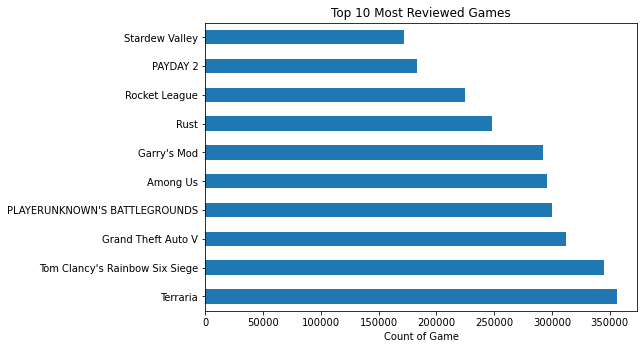

In [15]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title("Top 10 Most Reviewed Games")
plt.xlabel('Count of Game')
df['app_name'].value_counts()[:10].plot(kind='barh')

In [16]:
recs = df["recommended"]
unique, counts = np.unique(recs, return_counts=True)
print("Non-recommendations:", counts[0], "Recommendations:", counts[1])
# Keep the split how it is

Non-recommendations: 896085 Recommendations: 7605946


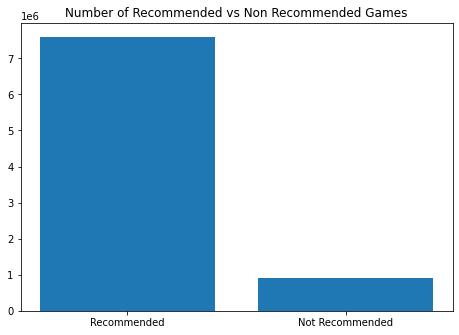

In [17]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

plt.title("Number of Recommended vs Non Recommended Games")

unique, counts = np.unique(df["recommended"], return_counts=True)
sizes = [counts[1], counts[0]]
labels = ['Recommended', 'Not Recommended']

ax.bar(labels,sizes)
plt.show()

## Trimming dataset down

In [18]:
len(df)

8502031

In [19]:

if(len(df) > 500000): 
    not_rec = df[df["recommended"]==0]
    num_no_rec= len(not_rec)

    #sample function shuffles the values
    yes_rec = df[df["recommended"]==1].sample(frac=1)[0:num_no_rec]
    num_yes_rec = len(df[df["recommended"]==1])

    # Cuts the dataset down to 500000 values while keeping the ratio of recommended vs nonrecommended
    var = int((num_no_rec/len(df)) * 500000)
    no_split = not_rec.sample(frac=1)[0:var]
    yes_split = df[df["recommended"]==1].sample(frac=1)[0:500000 - var]

    df_equal = pd.concat([no_split,yes_split])

    # The left over data will be used for prediction testing of our classifiers
    no_split_leftover = not_rec.sample(frac=1)[var:num_no_rec]
    yes_split_leftover = df[df["recommended"]==1].sample(frac=1)[500000 - var:num_yes_rec]

    # Unclassified data set
    df_test = pd.concat([no_split_leftover, yes_split_leftover])
else:
    not_rec = df[df["recommended"]==0]
    num_no_rec= len(not_rec)

    #sample function shuffles the values
    yes_rec = df[df["recommended"]==1].sample(frac=1)[0:num_no_rec]
    num_yes_rec = len(df[df["recommended"]==1])

    # Cuts the dataset down to 100000 values while keeping the ratio of recommended vs nonrecommended
    var = int((num_no_rec/len(df)) * 100000)
    no_split = not_rec.sample(frac=1)[0:var]
    yes_split = df[df["recommended"]==1].sample(frac=1)[0:100000 - var]

    df_equal = pd.concat([no_split,yes_split])

    # The left over data will be used for prediction testing of our classifiers
    no_split_leftover = not_rec.sample(frac=1)[var:num_no_rec]
    yes_split_leftover = df[df["recommended"]==1].sample(frac=1)[100000 - var:num_yes_rec]

    # Unclassified data set
    df_test = pd.concat([no_split_leftover, yes_split_leftover])

In [20]:
recs = df_test["recommended"]
unique, counts = np.unique(recs, return_counts=True)
print("Unclassified Data Set = Non-recommendations:", counts[0], "Recommendations:", counts[1])

Unclassified Data Set = Non-recommendations: 843387 Recommendations: 7158644


In [21]:
recs = df_equal["recommended"]
unique, counts = np.unique(recs, return_counts=True)
print("Classified Data Set = Non-recommendations:", counts[0], "Recommendations:", counts[1])
# Keep the split how it is

Classified Data Set = Non-recommendations: 52698 Recommendations: 447302


In [22]:
df_equal

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
1428760,3244359,ATLAS,english,haha,1555126092,1555126092,0,6,4,0,True,False,True,149,2,3778.0,0.0,2200.0,1.566625e+09
7187876,16649807,ARK: Survival Evolved,english,How can a game that isn't finished make more m...,1473738196,1473738196,0,12,0,0,True,False,True,611,26,3440.0,0.0,3400.0,1.471743e+09
1409447,3207990,"Warhammer 40,000: Dawn of War III",english,"Well, this game sucks. I liked the first one, ...",1596751777,1596751777,0,2,1,0,False,False,False,2063,112,181.0,0.0,181.0,1.596751e+09
1509999,3415652,The Binding of Isaac: Rebirth,english,Uglier graphics and worse controls compared to...,1415643118,1415643118,0,7,0,4,True,False,False,1124,2,7539.0,0.0,15.0,1.608724e+09
7960608,18354944,BATTLETECH,english,"are you F kidding me? my i-core 5, 16gb ram, g...",1559761494,1559761494,0,8,10,3,True,False,False,29,5,211.0,27.0,83.0,1.610179e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3903668,8510097,Helltaker,english,Sup! I've just want to say about this game. I'...,1606809902,1606809902,1,1,0,0,False,False,False,399,15,190.0,0.0,76.0,1.608846e+09
436167,1086764,Garry's Mod,english,it's pretty cool to bully your friends using S...,1580171344,1580171344,1,0,0,1,True,False,False,23,1,16953.0,787.0,363.0,1.610958e+09
1430636,3248071,ATLAS,english,sorry if my spelling is bad.Atlas just like ar...,1547233526,1547233526,1,2,1,0,True,False,True,58,2,3417.0,0.0,1822.0,1.570553e+09
4784095,10329443,Dead Cells,english,Great game tons of fun.,1587413020,1587413020,1,0,0,0,False,False,False,32,9,4099.0,1.0,2814.0,1.610657e+09


In [23]:
#sample function shuffles the values
shuffled = df_equal.sample(frac=1)[0:len(df_equal)]

updated_df = shuffled

## Normilazation

In [24]:
from sklearn import preprocessing

def calc_norm(dataframe):
    # ["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews"]
    df_norm = preprocessing.normalize(dataframe[classifier_cols])
    df_norm = pd.DataFrame(df_norm)

    dataframe[classifier_cols] = np.array(df_norm)
    return dataframe

## Standardization

In [25]:
def calc_stand(dataframe):
    # ["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews"]
    dataframe[classifier_cols] = preprocessing.StandardScaler().fit_transform(dataframe[classifier_cols])

    return dataframe

## Sentiment Analysis

In [26]:
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

text = "I love you so much"

s = TextBlob("I love you so much")
print("Textblob:", s.sentiment)

s1 = SentimentIntensityAnalyzer()
sentiment_dict = s1.polarity_scores(text)
print("VADER:", sentiment_dict)
if sentiment_dict['compound'] >= 0.05 :
    print("Positive")

elif sentiment_dict['compound'] <= - 0.05 :
    print("Negative")

else :
    print("Neutral")

Textblob: Sentiment(polarity=0.35, subjectivity=0.4)
VADER: {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'compound': 0.6369}
Positive


In [27]:
def calc_polarity(dataframe):
    polarityV = []
    polarityV_label = []
    s = SentimentIntensityAnalyzer()
    for review in dataframe["review"]:
        sent_dict = s.polarity_scores(str(review))
        polarityV.append(sent_dict['compound'])

    dataframe["polarityV"] = polarityV
    return dataframe

In [28]:
#updated_df = calc_norm(updated_df)
updated_df = calc_stand(updated_df)
updated_df = calc_polarity(updated_df)

## KNN Classification

In [29]:
data_KNN = updated_df[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_KNN = updated_df["recommended"]

X_KNN = np.array(data_KNN)
Y_KNN = np.array(labels_KNN)

In [30]:
x_train_KNN, x_test_KNN, y_train_KNN, y_test_KNN = sklearn.model_selection.train_test_split(X_KNN, Y_KNN, test_size = 0.20, random_state = 0)

In [31]:
x_train_KNN

array([[ 0.60408545, -0.02259026,  2.0643878 , -0.57773297, -0.29227086,
        -0.3724    ],
       [-0.04248207, -0.02259026, -0.2565494 , -0.48302423, -0.04908087,
         0.8658    ],
       [ 0.00370132,  0.06609127, -0.32746693,  0.76696695, -0.18418642,
         0.4767    ],
       ...,
       [ 0.1884349 , -0.02259026,  0.26566147, -0.51319148, -0.18418642,
         0.8325    ],
       [-0.01939038, -0.02259026,  0.81688405, -0.3566091 , -0.07610198,
         0.319     ],
       [-0.04248207, -0.02259026,  0.3784848 , -0.48117726, -0.26524975,
         0.7184    ]])

In [32]:
y_test_KNN

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(x_train_KNN, y_train_KNN)

KNeighborsClassifier(n_neighbors=7)

In [34]:
x_test_KNN

array([[-0.01939038, -0.02259026, -0.32101988,  0.58965741,  0.11304579,
         0.0985    ],
       [-0.04248207,  0.00697025, -0.15984369, -0.48825733, -0.10312309,
         0.5106    ],
       [-0.01939038, -0.02259026, -0.31779636,  0.40424171, -0.10312309,
         0.9807    ],
       ...,
       [-0.04248207, -0.02259026, -0.11149083, -0.25646205,  0.89665798,
         0.        ],
       [-0.01939038, -0.02259026, -0.47252551, -0.54961792, -0.26524975,
         0.7778    ],
       [-0.04248207, -0.02259026, -0.52087836, -0.51011319, -0.29227086,
         0.        ]])

In [35]:
y_test_KNN[:40]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [36]:
y_pred_KNN = classifier.predict(x_test_KNN)
y_pred_KNN[:40]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test_KNN, y_pred_KNN)
ac = accuracy_score(y_test_KNN, y_pred_KNN)
print(ac)

0.90098


In [38]:
from sklearn import metrics

KNN_accuracy_train = metrics.accuracy_score(y_test_KNN, y_pred_KNN)
KNN_precision_train = metrics.precision_score(y_test_KNN, y_pred_KNN)
KNN_recall_train = metrics.recall_score(y_test_KNN, y_pred_KNN)
KNN_f1_train = metrics.f1_score(y_test_KNN, y_pred_KNN)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_KNN, y_pred_KNN))
print("Precision:",metrics.precision_score(y_test_KNN, y_pred_KNN))
print("Recall:",metrics.recall_score(y_test_KNN, y_pred_KNN))
print("F1:",metrics.f1_score(y_test_KNN, y_pred_KNN))

Accuracy: 0.90098
Precision: 0.9140645322401074
Recall: 0.9816406119051078
F1: 0.9466481319841809


## Classifier testing on untrained data

In [39]:
# Shuffle the data around
df_test_KNN = df_test.sample(frac=1)[0:len(df_test)]
yes_recs_KNN = df_test_KNN[df_test_KNN["recommended"]==1]
no_recs_KNN = df_test_KNN[df_test_KNN["recommended"]==0]
df_test_KNN = pd.concat([yes_recs_KNN[:5], no_recs_KNN[:5]])

In [40]:
#df_test_NB = calc_norm(df_test_NB)
df_test_KNN = calc_stand(df_test_KNN)
df_test_KNN = calc_polarity(df_test_KNN)

In [41]:
df_test_KNN[["app_name", "review", "polarityV", "recommended", "votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews"]]

,app_name,review,polarityV,recommended,votes_helpful,votes_funny,author.num_games_owned,author.playtime_at_review,author.num_reviews
7465301,Fallout 4,Fallout 4 is a revolutionary game for it's tim...,0.5719,1,-0.363037,-0.333333,-0.320598,0.890418,-0.251810
8698232,Conan Exiles,I love the open nature of the world and the ab...,0.9501,1,-0.363037,-0.333333,-0.496926,2.232852,-0.566572
4663929,Rocket League,yes,0.4019,1,-0.272278,-0.333333,0.945763,0.247860,0.167873
2758776,Tom Clancy's Rainbow Six Siege,sdfgssdfsf,0.0000,1,-0.363037,-0.333333,-0.665240,0.985269,-0.461651
1702156,Factorio,"Hard, deep and takes all your time... Really g...",0.6478,1,-0.363037,-0.333333,-0.504941,-0.754099,-0.461651
3533566,Rust,why is this game still on alpha developers sho...,0.7067,0,-0.363037,-0.333333,-0.577076,-0.607843,-0.566572
4564879,Rocket League,"The game itself is extremely well done, but if...",0.9201,0,-0.181518,-0.333333,-0.216403,-0.672798,-0.461651
4559671,Rocket League,good\n,0.4404,0,-0.363037,-0.333333,-0.496926,-0.804321,-0.461651
929626,Sid Meier's Civilization VI,"I played a lot of Civ 5, so I got this one. I...",-0.3182,0,-0.363037,-0.333333,-0.368687,-0.773671,0.167873
7557125,Fallout 4,The gameplay is fun. I'll give it that but pre...,0.7513,0,2.995054,3.000000,2.701035,-0.743668,2.895813


In [42]:
data_KNN_UNT = df_test_KNN[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_KNN_UNT = df_test_KNN["recommended"]

X_KNN_UNT = np.array(data_KNN_UNT)
Y_KNN_UNT = np.array(labels_KNN_UNT)

In [43]:
df_test_KNN[["review","recommended", "votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]

,review,recommended,votes_helpful,votes_funny,author.num_games_owned,author.playtime_at_review,author.num_reviews,polarityV
7465301,Fallout 4 is a revolutionary game for it's tim...,1,-0.363037,-0.333333,-0.320598,0.890418,-0.251810,0.5719
8698232,I love the open nature of the world and the ab...,1,-0.363037,-0.333333,-0.496926,2.232852,-0.566572,0.9501
4663929,yes,1,-0.272278,-0.333333,0.945763,0.247860,0.167873,0.4019
2758776,sdfgssdfsf,1,-0.363037,-0.333333,-0.665240,0.985269,-0.461651,0.0000
1702156,"Hard, deep and takes all your time... Really g...",1,-0.363037,-0.333333,-0.504941,-0.754099,-0.461651,0.6478
3533566,why is this game still on alpha developers sho...,0,-0.363037,-0.333333,-0.577076,-0.607843,-0.566572,0.7067
4564879,"The game itself is extremely well done, but if...",0,-0.181518,-0.333333,-0.216403,-0.672798,-0.461651,0.9201
4559671,good\n,0,-0.363037,-0.333333,-0.496926,-0.804321,-0.461651,0.4404
929626,"I played a lot of Civ 5, so I got this one. I...",0,-0.363037,-0.333333,-0.368687,-0.773671,0.167873,-0.3182
7557125,The gameplay is fun. I'll give it that but pre...,0,2.995054,3.000000,2.701035,-0.743668,2.895813,0.7513


In [44]:
y_pred_KNN_UNT = classifier.predict(X_KNN_UNT)
print(y_pred_KNN_UNT)

[1 1 1 1 1 1 1 1 1 1]


In [45]:
Y_KNN_UNT

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [46]:
# Model Accuracy
KNN_accuracy = metrics.accuracy_score(Y_KNN_UNT, y_pred_KNN_UNT)
KNN_precision = metrics.precision_score(Y_KNN_UNT, y_pred_KNN_UNT)
KNN_recall = metrics.recall_score(Y_KNN_UNT, y_pred_KNN_UNT)
KNN_f1 = metrics.f1_score(Y_KNN_UNT, y_pred_KNN_UNT)
print("Accuracy:",metrics.accuracy_score(Y_KNN_UNT, y_pred_KNN_UNT))
print("Precision:",metrics.precision_score(Y_KNN_UNT, y_pred_KNN_UNT))
print("Recall:",metrics.recall_score(Y_KNN_UNT, y_pred_KNN_UNT))
print("F1:",metrics.f1_score(Y_KNN_UNT, y_pred_KNN_UNT))

Accuracy: 0.5
Precision: 0.5
Recall: 1.0
F1: 0.6666666666666666


## Naive Bayes Classification

In [47]:
data_NB = updated_df[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_NB = updated_df["recommended"]

X_NB = np.array(data_NB)
Y_NB = np.array(labels_NB)

In [48]:
x_train_NB, x_test_NB, y_train_NB, y_test_NB = sklearn.model_selection.train_test_split(X_NB, Y_NB, test_size = 0.20, random_state = 0)

In [49]:
x_train_NB

array([[ 0.60408545, -0.02259026,  2.0643878 , -0.57773297, -0.29227086,
        -0.3724    ],
       [-0.04248207, -0.02259026, -0.2565494 , -0.48302423, -0.04908087,
         0.8658    ],
       [ 0.00370132,  0.06609127, -0.32746693,  0.76696695, -0.18418642,
         0.4767    ],
       ...,
       [ 0.1884349 , -0.02259026,  0.26566147, -0.51319148, -0.18418642,
         0.8325    ],
       [-0.01939038, -0.02259026,  0.81688405, -0.3566091 , -0.07610198,
         0.319     ],
       [-0.04248207, -0.02259026,  0.3784848 , -0.48117726, -0.26524975,
         0.7184    ]])

In [50]:
y_test_NB

array([1, 1, 1, ..., 1, 1, 1])

In [51]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(x_train_NB, y_train_NB)

GaussianNB()

In [52]:
x_test_NB

array([[-0.01939038, -0.02259026, -0.32101988,  0.58965741,  0.11304579,
         0.0985    ],
       [-0.04248207,  0.00697025, -0.15984369, -0.48825733, -0.10312309,
         0.5106    ],
       [-0.01939038, -0.02259026, -0.31779636,  0.40424171, -0.10312309,
         0.9807    ],
       ...,
       [-0.04248207, -0.02259026, -0.11149083, -0.25646205,  0.89665798,
         0.        ],
       [-0.01939038, -0.02259026, -0.47252551, -0.54961792, -0.26524975,
         0.7778    ],
       [-0.04248207, -0.02259026, -0.52087836, -0.51011319, -0.29227086,
         0.        ]])

In [53]:
y_test_NB[:40]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [54]:
y_pred_NB = classifier.predict(x_test_NB)
y_pred_NB[:40]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [55]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test_NB, y_pred_NB)
ac = accuracy_score(y_test_NB, y_pred_NB)
print(ac)

0.8902


In [56]:
from sklearn import metrics

NB_accuracy_train = metrics.accuracy_score(y_test_NB, y_pred_NB)
NB_precision_train = metrics.precision_score(y_test_NB, y_pred_NB)
NB_recall_train = metrics.recall_score(y_test_NB, y_pred_NB)
NB_f1_train = metrics.f1_score(y_test_NB, y_pred_NB)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_NB, y_pred_NB))
print("Precision:",metrics.precision_score(y_test_NB, y_pred_NB))
print("Recall:",metrics.recall_score(y_test_NB, y_pred_NB))
print("F1:",metrics.f1_score(y_test_NB, y_pred_NB))

Accuracy: 0.8902
Precision: 0.9044498706972048
Recall: 0.9809366304991564
F1: 0.9411417850442241


## Classifier testing on untrained data

In [57]:
# Shuffle the data around
df_test_NB = df_test.sample(frac=1)[0:len(df_test)]
yes_recs_NB = df_test_NB[df_test_NB["recommended"]==1]
no_recs_NB = df_test_NB[df_test_NB["recommended"]==0]
df_test_NB = pd.concat([yes_recs_NB[:5], no_recs_NB[:5]])

In [58]:
#df_test_NB = calc_norm(df_test_NB)
df_test_NB = calc_stand(df_test_NB)
df_test_NB = calc_polarity(df_test_NB)

In [59]:
df_test_NB[["app_name", "review", "polarityV", "recommended", "votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews"]]

,app_name,review,polarityV,recommended,votes_helpful,votes_funny,author.num_games_owned,author.playtime_at_review,author.num_reviews
4642973,Rocket League,good game,0.4404,1,-1.028992,0.0,-0.619241,2.149786,-0.625040
2140555,Borderlands 3,Game Good Yes yes\nPlay Game Good Game Yes Gam...,0.9522,1,-0.171499,0.0,-0.731423,-0.282565,-0.393544
8192453,Terraria,"10/10 Even with the last update coming, I, for...",0.6369,1,-1.028992,0.0,-0.569882,1.678836,-0.972285
7344256,No Man's Sky,Only a few hours in but the game is definately...,0.4596,1,0.685994,0.0,0.300646,-0.683110,-0.393544
4335066,Dishonored,Really great game.\nThe skills's mechanic is v...,0.8070,1,-1.028992,0.0,-0.408340,-0.670068,-0.046299
1347001,RollerCoaster Tycoon World,Hopefully people will overlook this edition to...,0.4019,0,1.543487,0.0,2.481453,-0.728781,2.268664
913529,Dead by Daylight,Barely any content and decides to release dlc ...,0.0000,0,0.685994,0.0,-0.408340,-0.711942,-0.277796
6551537,PLAYERUNKNOWN'S BATTLEGROUNDS,Love hate relationship with this game,0.1280,0,-1.028992,0.0,-0.525009,0.107636,1.574175
6551877,PLAYERUNKNOWN'S BATTLEGROUNDS,Having played over 200 hours on this game the ...,0.9555,0,1.543487,0.0,1.184636,-0.160393,-0.625040
6137200,Grand Theft Auto V,it takes a lot of time to load but we have not...,0.8454,0,-0.171499,0.0,-0.704499,-0.699400,-0.509292


In [60]:
data_NB_UNT = df_test_NB[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_NB_UNT = df_test_NB["recommended"]

X_NB_UNT = np.array(data_NB_UNT)
Y_NB_UNT = np.array(labels_NB_UNT)

In [61]:
df_test_NB[["review","recommended", "votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]

,review,recommended,votes_helpful,votes_funny,author.num_games_owned,author.playtime_at_review,author.num_reviews,polarityV
4642973,good game,1,-1.028992,0.0,-0.619241,2.149786,-0.625040,0.4404
2140555,Game Good Yes yes\nPlay Game Good Game Yes Gam...,1,-0.171499,0.0,-0.731423,-0.282565,-0.393544,0.9522
8192453,"10/10 Even with the last update coming, I, for...",1,-1.028992,0.0,-0.569882,1.678836,-0.972285,0.6369
7344256,Only a few hours in but the game is definately...,1,0.685994,0.0,0.300646,-0.683110,-0.393544,0.4596
4335066,Really great game.\nThe skills's mechanic is v...,1,-1.028992,0.0,-0.408340,-0.670068,-0.046299,0.8070
1347001,Hopefully people will overlook this edition to...,0,1.543487,0.0,2.481453,-0.728781,2.268664,0.4019
913529,Barely any content and decides to release dlc ...,0,0.685994,0.0,-0.408340,-0.711942,-0.277796,0.0000
6551537,Love hate relationship with this game,0,-1.028992,0.0,-0.525009,0.107636,1.574175,0.1280
6551877,Having played over 200 hours on this game the ...,0,1.543487,0.0,1.184636,-0.160393,-0.625040,0.9555
6137200,it takes a lot of time to load but we have not...,0,-0.171499,0.0,-0.704499,-0.699400,-0.509292,0.8454


In [62]:
y_pred_NB_UNT = classifier.predict(X_NB_UNT)
print(y_pred_NB_UNT)

[1 1 1 1 1 0 1 1 1 1]


In [63]:
Y_NB_UNT

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [64]:
# Model Accuracy
NB_accuracy = metrics.accuracy_score(Y_NB_UNT, y_pred_NB_UNT)
NB_precision = metrics.precision_score(Y_NB_UNT, y_pred_NB_UNT)
NB_recall = metrics.recall_score(Y_NB_UNT, y_pred_NB_UNT)
NB_f1 = metrics.f1_score(Y_NB_UNT, y_pred_NB_UNT)
print("Accuracy:",metrics.accuracy_score(Y_NB_UNT, y_pred_NB_UNT))
print("Precision:",metrics.precision_score(Y_NB_UNT, y_pred_NB_UNT))
print("Recall:",metrics.recall_score(Y_NB_UNT, y_pred_NB_UNT))
print("F1:",metrics.f1_score(Y_NB_UNT, y_pred_NB_UNT))

Accuracy: 0.6
Precision: 0.5555555555555556
Recall: 1.0
F1: 0.7142857142857143


## XGBoost Classification

In [65]:
updated_df

,Unnamed: 0,app_name,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,comment_count,steam_purchase,received_for_free,written_during_early_access,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played,polarityV
3195891,7108644,Among Us,english,sfdvzfg,1600217699,1600217699,1,-0.042482,-0.022590,0,True,False,False,-0.507984,-0.265250,10374.0,97.0,-0.302329,1.610724e+09,0.0000
6937203,16122350,Stellaris,english,Its just fun\n,1578601620,1578601620,1,-0.042482,-0.022590,0,True,False,False,-0.430620,-0.211208,57555.0,0.0,4.344761,1.608933e+09,0.5106
7753051,17856390,Pillars of Eternity II: Deadfire,english,Improved on the first. Just a beautiful game.,1569942106,1569942106,1,-0.019390,-0.022590,0,False,False,False,-0.304902,0.140067,1538.0,0.0,-0.546027,1.570640e+09,0.7906
2307592,5395124,DOOM Eternal,english,"Super intense combat, very challenging (IMO wa...",1597637723,1597637723,1,-0.042482,-0.022590,0,True,False,False,-0.491867,-0.292271,3404.0,0.0,-0.541922,1.600451e+09,0.8525
6512890,14946424,PLAYERUNKNOWN'S BATTLEGROUNDS,english,yaaaaaaaaaaassssss,1513873887,1513873887,1,-0.019390,0.006970,0,True,False,False,-0.085703,0.004961,11699.0,0.0,-0.004453,1.609645e+09,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512176,11835040,Saints Row: The Third,english,10/10,1561830441,1561830441,1,-0.042482,-0.022590,0,True,False,False,-0.301679,-0.157165,3837.0,0.0,-0.400218,1.575111e+09,0.0000
4820670,10418943,VA-11 Hall-A: Cyberpunk Bartender Action,english,Bartending with Waifus\nIs there more to know?,1482955492,1488546847,1,0.096068,-0.022590,0,True,False,False,0.932931,0.031982,1258.0,0.0,-0.475534,1.565480e+09,0.0000
3511899,7713157,Rust,english,> Joins the game.\n> D**ks everywhere.\n> Cenz...,1466037102,1466037102,1,-0.019390,0.006970,0,True,False,True,-0.269443,-0.265250,24166.0,0.0,0.613565,1.548011e+09,-0.4291
6908138,16049256,Assassin's Creed Origins,english,good game\n,1577579543,1577579543,1,-0.042482,-0.022590,0,True,False,False,-0.333914,-0.103123,2754.0,1.0,-0.578862,1.610617e+09,0.4404


In [66]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [67]:
data_XGB = updated_df[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_XGB = updated_df["recommended"]

X_XGB = np.array(data_XGB)
Y_XGB = np.array(labels_XGB)

In [68]:
X_train_XGB, X_test_XGB, y_train_XGB, y_test_XGB = train_test_split(X_XGB, Y_XGB, test_size=0.20, random_state=0)

In [69]:
# fit model no training data

no_vals = updated_df[updated_df["recommended"]==0]
yes_vals = updated_df[updated_df["recommended"]==1]

# Controls the balance of positive and negative weights as recommended by the xgboost docs
ratio = float(np.sum(len(no_vals))) / np.sum(len(yes_vals))

model = XGBClassifier(scale_pos_weight = ratio)
model.fit(X_train_XGB, y_train_XGB)

C:\Users\Tarnjit458\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:16:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=0.11781302118032112,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [70]:
# make predictions for test data
y_pred_XGB = model.predict(X_test_XGB)
y_pred_XGB

array([0, 1, 1, ..., 1, 1, 1])

In [71]:
y_test_XGB

array([1, 1, 1, ..., 1, 1, 1])

In [72]:
XGB_accuracy_train = metrics.accuracy_score(y_test_XGB, y_pred_XGB)
XGB_precision_train = metrics.precision_score(y_test_XGB, y_pred_XGB)
XGB_recall_train = metrics.recall_score(y_test_XGB, y_pred_XGB)
XGB_f1_train = metrics.f1_score(y_test_XGB, y_pred_XGB)


# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_XGB, y_pred_XGB))
print("Precision:",metrics.precision_score(y_test_XGB, y_pred_XGB))
print("Recall:",metrics.recall_score(y_test_XGB, y_pred_XGB))
print("F1:",metrics.f1_score(y_test_XGB, y_pred_XGB))

Accuracy: 0.80962
Precision: 0.9682444736877085
Recall: 0.8139589455922942
F1: 0.8844234528478284


## Classifier testing on untrained data

In [73]:
# Shuffle the data around
df_test_XGB = df_test.sample(frac=1)[0:len(df_test)]
yes_recs_XGB = df_test_XGB[df_test_XGB["recommended"]==1]
no_recs_XGB = df_test_XGB[df_test_XGB["recommended"]==0]
df_test_XGB = pd.concat([yes_recs_XGB[:5], no_recs_XGB[:5]])

In [74]:
#df_test_NB = calc_norm(df_test_NB)
df_test_XGB = calc_stand(df_test_XGB)
df_test_XGB = calc_polarity(df_test_XGB)

In [75]:
df_test_XGB[["app_name", "review","recommended", "votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]

,app_name,review,recommended,votes_helpful,votes_funny,author.num_games_owned,author.playtime_at_review,author.num_reviews,polarityV
7222460,ARK: Survival Evolved,you can ride on dinosaurs so thats cool i guess,1,-0.468521,0.0,-0.698490,-0.715878,-0.922958,0.3774
2818750,Tom Clancy's Rainbow Six Siege,Good game.,1,-0.468521,0.0,-0.432760,-0.550809,-0.120386,0.4404
3144082,Among Us,This game is absolute fire.,1,-0.468521,0.0,-1.078104,-0.729766,-0.922958,-0.3400
3816711,Phasmophobia,"Love this game, great for an eerie mood setter...",1,1.093216,0.0,0.870582,-0.482075,-0.521672,0.7783
1953773,Wallpaper Engine,Wall paper\n,1,-0.468521,0.0,-1.217296,-0.468539,-0.120386,0.0000
4902434,Divinity: Original Sin 2,I recommend this to people that have nothing b...,0,-0.468521,0.0,0.313814,-0.872860,-0.120386,-0.9332
6227444,Grand Theft Auto V,no mods.,0,-0.468521,0.0,0.984466,2.253426,-0.120386,-0.2960
6291624,Grand Theft Auto V,Very buggy and no support to stop the cheating...,0,-0.468521,0.0,1.503272,0.012253,1.886045,-0.9392
2278022,MORDHAU,Would not recommend to buy untill they add a V...,0,2.654954,0.0,1.009774,0.018230,1.886045,-0.9393
2615249,Tom Clancy's Rainbow Six Siege,so many bugs,0,-0.468521,0.0,-1.255258,1.536018,-0.922958,0.0000


In [76]:
data_XGB_UNT = df_test_XGB[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_XGB_UNT = df_test_XGB["recommended"]

X_XBG_UNT = np.array(data_XGB_UNT)
Y_XBG_UNT = np.array(labels_XGB_UNT)

In [77]:
y_pred_XGB_UNT = model.predict(X_XBG_UNT)
y_pred_XGB_UNT

C:\Users\Tarnjit458\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [78]:
Y_XBG_UNT

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [79]:
# Model Accuracy
XBG_accuracy = metrics.accuracy_score(Y_XBG_UNT, y_pred_XGB_UNT)
XBG_precision = metrics.precision_score(Y_XBG_UNT, y_pred_XGB_UNT)
XBG_recall = metrics.recall_score(Y_XBG_UNT, y_pred_XGB_UNT)
XBG_f1 = metrics.f1_score(Y_XBG_UNT, y_pred_XGB_UNT)
print("Accuracy:",metrics.accuracy_score(Y_XBG_UNT, y_pred_XGB_UNT))
print("Precision:",metrics.precision_score(Y_XBG_UNT, y_pred_XGB_UNT))
print("Recall:",metrics.recall_score(Y_XBG_UNT, y_pred_XGB_UNT))
print("F1:",metrics.f1_score(Y_XBG_UNT, y_pred_XGB_UNT))

Accuracy: 0.7
Precision: 1.0
Recall: 0.4
F1: 0.5714285714285715


## AdaBoost Classification

In [80]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

data_ada = updated_df[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_ada = updated_df["recommended"]

X_ada = np.array(data_ada)
Y_ada = np.array(labels_ada)

X_train_ada, X_test_ada, y_train_ada, y_test_ada = sklearn.model_selection.train_test_split(X_ada, Y_ada, test_size=0.20, random_state=0)

In [81]:
# fit model no training data

no_vals = updated_df[updated_df["recommended"]==0]
yes_vals = updated_df[updated_df["recommended"]==1]

# Controls the balance of positive and negative weights as recommended by the xgboost docs
ratio = float(np.sum(len(no_vals))) / np.sum(len(yes_vals))

model = AdaBoostClassifier(n_estimators=100, random_state=0)
model.fit(X_train_ada, y_train_ada)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [82]:
# make predictions for test data
y_pred_ada = model.predict(X_test_ada)

In [83]:
ADA_accuracy_train = metrics.accuracy_score(y_test_ada, y_pred_ada)
ADA_precision_train = metrics.precision_score(y_test_ada, y_pred_ada)
ADA_recall_train = metrics.recall_score(y_test_ada, y_pred_ada)
ADA_f1_train = metrics.f1_score(y_test_ada, y_pred_ada)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test_ada, y_pred_ada))
print("Precision:",metrics.precision_score(y_test_ada, y_pred_ada))
print("Recall:",metrics.recall_score(y_test_ada, y_pred_ada))
print("F1:",metrics.f1_score(y_test_ada, y_pred_ada))

Accuracy: 0.90936
Precision: 0.9224684042989063
Recall: 0.9811824652758377
F1: 0.9509199796402386


## Ada Classifier testing on untrained data

In [84]:
# Shuffle the data around
df_test_ada = df_test.sample(frac=1)[0:len(df_test)]
yes_recs = df_test_ada[df_test_ada["recommended"]==1]
no_recs = df_test_ada[df_test_ada["recommended"]==0]
# randomly choose 5 recommended and 5 non recommended reviews
df_test_ada = pd.concat([yes_recs[:5], no_recs[:5]])

In [85]:
polarityV = []
polarityV_label = []
s = SentimentIntensityAnalyzer()
for review in df_test_ada["review"]:
    sent_dict = s.polarity_scores(str(review))
    polarityV.append(sent_dict['compound'])
    
df_test_ada["polarityV"] = polarityV

In [86]:
data_UNT_ada = df_test_ada[["votes_helpful", "votes_funny", "author.num_games_owned", "author.playtime_at_review", "author.num_reviews", 
                   "polarityV"]]
labels_UNT_ada = df_test_ada["recommended"]

X_UNT_ada = np.array(data_UNT_ada)
Y_UNT_ada = np.array(labels_UNT_ada)

In [87]:
y_pred_UNT_ada = model.predict(X_UNT_ada)

In [88]:
# Model Accuracy
ada_accuracy = metrics.accuracy_score(Y_UNT_ada, y_pred_UNT_ada)
ada_precision = metrics.precision_score(Y_UNT_ada, y_pred_UNT_ada)
ada_recall = metrics.recall_score(Y_UNT_ada, y_pred_UNT_ada)
ada_f1 = metrics.f1_score(Y_UNT_ada, y_pred_UNT_ada)
print("Accuracy:",metrics.accuracy_score(Y_UNT_ada, y_pred_UNT_ada))
print("Precision:",metrics.precision_score(Y_UNT_ada, y_pred_UNT_ada))
print("Recall:",metrics.recall_score(Y_UNT_ada, y_pred_UNT_ada))
print("F1:",metrics.f1_score(Y_UNT_ada, y_pred_UNT_ada))

Accuracy: 0.9
Precision: 0.8333333333333334
Recall: 1.0
F1: 0.9090909090909091


## Analysis of the results

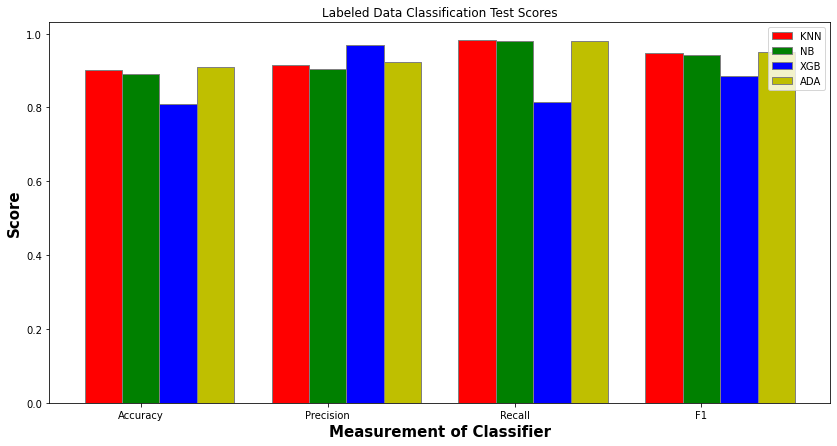

In [89]:
# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(14, 7))
plt.title("Labeled Data Classification Test Scores")

# set height of bar
Y_LAB_KNN = [KNN_accuracy_train, KNN_precision_train, KNN_recall_train, KNN_f1_train] 
Y_LAB_NB = [NB_accuracy_train, NB_precision_train, NB_recall_train, NB_f1_train] 
Y_LAB_XGB = [XGB_accuracy_train, XGB_precision_train, XGB_recall_train, XGB_f1_train] 
Y_LAB_ADA = [ADA_accuracy_train, ADA_precision_train, ADA_recall_train, ADA_f1_train]

br1 = np.arange(len(Y_LAB_KNN))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, Y_LAB_KNN, color ='r', width = barWidth,
        edgecolor ='grey', label ='KNN')
plt.bar(br2, Y_LAB_NB, color ='g', width = barWidth,
        edgecolor ='grey', label ='NB')
plt.bar(br3, Y_LAB_XGB, color ='b', width = barWidth,
        edgecolor ='grey', label ='XGB')
plt.bar(br4, Y_LAB_ADA, color ='y', width = barWidth,
        edgecolor ='grey', label ='ADA')
    
# Adding Xticks
X_LAB = "Accuracy", "Precision", "Recall", "F1"; 
plt.xlabel('Measurement of Classifier', fontweight ='bold', fontsize = 15)
plt.ylabel('Score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Y_LAB_KNN))],
        ['Accuracy', 'Precision', 'Recall', 'F1'])
 
plt.legend()
plt.show()

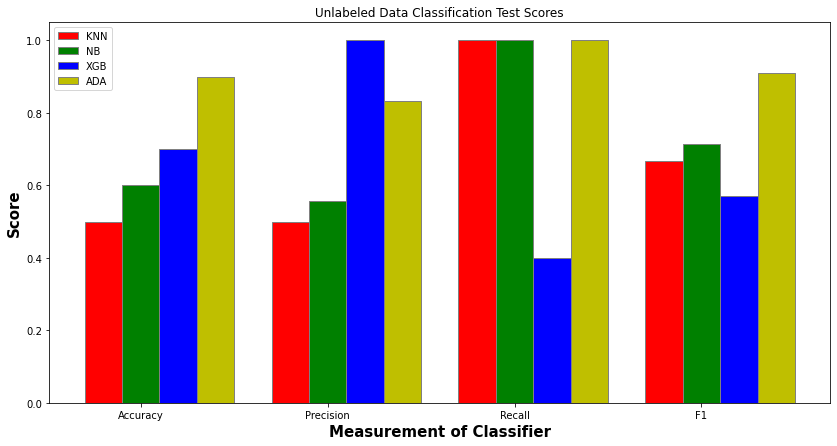

In [90]:
# set width of bar
barWidth = 0.2
fig = plt.subplots(figsize =(14, 7))
plt.title("Unlabeled Data Classification Test Scores")

# set height of bar
Y_UNLAB_KNN = [KNN_accuracy, KNN_precision, KNN_recall, KNN_f1] 
Y_UNLAB_NB = [NB_accuracy, NB_precision, NB_recall, NB_f1] 
Y_UNLAB_XGB = [XBG_accuracy, XBG_precision, XBG_recall, XBG_f1] 
Y_UNLAB_ADA = [ada_accuracy, ada_precision, ada_recall, ada_f1]

br1 = np.arange(len(Y_UNLAB_KNN))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, Y_UNLAB_KNN, color ='r', width = barWidth,
        edgecolor ='grey', label ='KNN')
plt.bar(br2, Y_UNLAB_NB, color ='g', width = barWidth,
        edgecolor ='grey', label ='NB')
plt.bar(br3, Y_UNLAB_XGB, color ='b', width = barWidth,
        edgecolor ='grey', label ='XGB')
plt.bar(br4, Y_UNLAB_ADA, color ='y', width = barWidth,
        edgecolor ='grey', label ='ADA')
    
# Adding Xticks
X_LAB = "Accuracy", "Precision", "Recall", "F1"; 
plt.xlabel('Measurement of Classifier', fontweight ='bold', fontsize = 15)
plt.ylabel('Score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Y_UNLAB_KNN))],
        ['Accuracy', 'Precision', 'Recall', 'F1'])
 
plt.legend()
plt.show()